In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv("winequality-red.csv")

In [3]:
dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
dataset.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
y = dataset["quality"]

In [6]:
dataset = dataset.drop(columns = "quality",axis = 1)

In [7]:
sc = MinMaxScaler()
dataset =sc.fit_transform(dataset)


In [8]:
pca = PCA(n_components =9)
dataset = pca.fit_transform(dataset)

In [9]:
x= dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 23)

In [12]:
le = LinearRegression()

In [13]:
model = le.fit(x_train,y_train)

In [14]:
y_pred = model.predict(x_test)

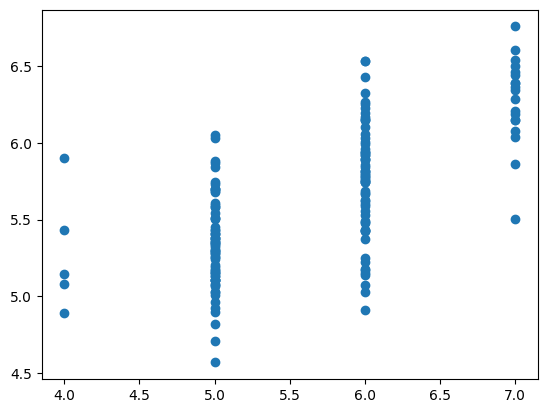

In [15]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [16]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(score*100)

45.08227417242803


In [18]:
import joblib
joblib.dump(le,"model.joblib")

['model.joblib']